In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
  
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | geraldton
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | aklavik
Processing Record 5 of Set 1 | coihaique
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | nikolskoye
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | porto santo
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | maceio
Processing Record 15 of Set 1 | tuktoyaktuk
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | uromi
Processing Record 18 of Set 1 | khonuu
City not found. Skipping...
Processing Record 19 of Set 1 | kodiak
Processing Record 20 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 21 of S

Processing Record 35 of Set 4 | amderma
City not found. Skipping...
Processing Record 36 of Set 4 | zhanaozen
Processing Record 37 of Set 4 | ketchikan
Processing Record 38 of Set 4 | chernyshevskiy
Processing Record 39 of Set 4 | faya
Processing Record 40 of Set 4 | takoradi
Processing Record 41 of Set 4 | komsomolskiy
Processing Record 42 of Set 4 | ribeira grande
Processing Record 43 of Set 4 | saint-pierre
Processing Record 44 of Set 4 | fairbanks
Processing Record 45 of Set 4 | visnes
Processing Record 46 of Set 4 | snasa
Processing Record 47 of Set 4 | bouna
Processing Record 48 of Set 4 | yulara
Processing Record 49 of Set 4 | lagoa
Processing Record 50 of Set 4 | kondinskoye
Processing Record 1 of Set 5 | ransang
Processing Record 2 of Set 5 | beringovskiy
Processing Record 3 of Set 5 | dikson
Processing Record 4 of Set 5 | xinyu
Processing Record 5 of Set 5 | chuy
Processing Record 6 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 7 of Set 5 | castro
Proce

Processing Record 25 of Set 8 | borlange
City not found. Skipping...
Processing Record 26 of Set 8 | przasnysz
Processing Record 27 of Set 8 | ampanihy
Processing Record 28 of Set 8 | mitu
Processing Record 29 of Set 8 | karasjok
Processing Record 30 of Set 8 | porto velho
Processing Record 31 of Set 8 | massakory
Processing Record 32 of Set 8 | ust-karsk
Processing Record 33 of Set 8 | galiwinku
City not found. Skipping...
Processing Record 34 of Set 8 | nakamura
Processing Record 35 of Set 8 | zuwarah
Processing Record 36 of Set 8 | christchurch
Processing Record 37 of Set 8 | rohnert park
Processing Record 38 of Set 8 | tiksi
Processing Record 39 of Set 8 | savonlinna
Processing Record 40 of Set 8 | barao de melgaco
Processing Record 41 of Set 8 | bereda
Processing Record 42 of Set 8 | channel-port aux basques
Processing Record 43 of Set 8 | yar-sale
Processing Record 44 of Set 8 | imbituba
Processing Record 45 of Set 8 | amapa
Processing Record 46 of Set 8 | richards bay
Processing

Processing Record 12 of Set 12 | taoudenni
Processing Record 13 of Set 12 | davila
Processing Record 14 of Set 12 | sao filipe
Processing Record 15 of Set 12 | sfantu gheorghe
Processing Record 16 of Set 12 | sivaki
Processing Record 17 of Set 12 | purpe
Processing Record 18 of Set 12 | luganville
Processing Record 19 of Set 12 | balabac
Processing Record 20 of Set 12 | chimoio
Processing Record 21 of Set 12 | jiangyou
Processing Record 22 of Set 12 | tual
Processing Record 23 of Set 12 | namibe
Processing Record 24 of Set 12 | havre-saint-pierre
Processing Record 25 of Set 12 | alta floresta
Processing Record 26 of Set 12 | pizhanka
Processing Record 27 of Set 12 | samusu
City not found. Skipping...
Processing Record 28 of Set 12 | el sauzal
Processing Record 29 of Set 12 | zihuatanejo
Processing Record 30 of Set 12 | chabahar
Processing Record 31 of Set 12 | port hueneme
Processing Record 32 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 33 of Set 12 | mahanoro
P

In [9]:
len(city_data)

569

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Geraldton,-28.7667,114.6000,45.01,87,0,8.05,AU,2021-09-04 17:39:43
1,Busselton,-33.6500,115.3333,47.08,87,2,6.85,AU,2021-09-04 17:39:44
2,Avarua,-21.2078,-159.7750,69.85,94,75,4.61,CK,2021-09-04 17:39:44
3,Aklavik,68.2191,-135.0107,48.20,100,90,3.44,CA,2021-09-04 17:39:44
4,Coihaique,-45.5752,-72.0662,52.41,58,75,8.05,CL,2021-09-04 17:39:45
5,Kapaa,22.0752,-159.3190,79.12,71,20,3.00,US,2021-09-04 17:39:45
6,Nikolskoye,59.7035,30.7861,48.09,82,85,7.31,RU,2021-09-04 17:39:45
7,Vaini,-21.2000,-175.2000,73.56,94,90,11.50,TO,2021-09-04 17:39:45
8,Hobart,-42.8794,147.3294,44.26,95,40,3.44,AU,2021-09-04 17:39:46
9,Rikitea,-23.1203,-134.9692,74.30,71,100,5.84,PF,2021-09-04 17:38:01


In [11]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Geraldton,AU,2021-09-04 17:39:43,-28.7667,114.6000,45.01,87,0,8.05
1,Busselton,AU,2021-09-04 17:39:44,-33.6500,115.3333,47.08,87,2,6.85
2,Avarua,CK,2021-09-04 17:39:44,-21.2078,-159.7750,69.85,94,75,4.61
3,Aklavik,CA,2021-09-04 17:39:44,68.2191,-135.0107,48.20,100,90,3.44
4,Coihaique,CL,2021-09-04 17:39:45,-45.5752,-72.0662,52.41,58,75,8.05
5,Kapaa,US,2021-09-04 17:39:45,22.0752,-159.3190,79.12,71,20,3.00
6,Nikolskoye,RU,2021-09-04 17:39:45,59.7035,30.7861,48.09,82,85,7.31
7,Vaini,TO,2021-09-04 17:39:45,-21.2000,-175.2000,73.56,94,90,11.50
8,Hobart,AU,2021-09-04 17:39:46,-42.8794,147.3294,44.26,95,40,3.44
9,Rikitea,PF,2021-09-04 17:38:01,-23.1203,-134.9692,74.30,71,100,5.84


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

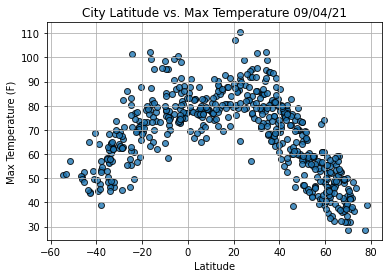

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

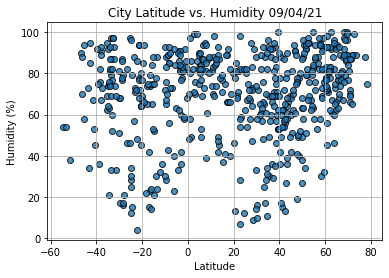

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

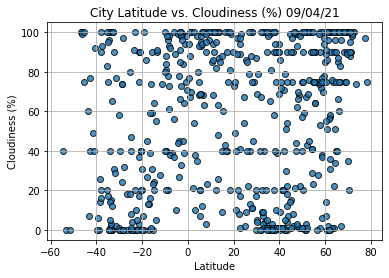

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

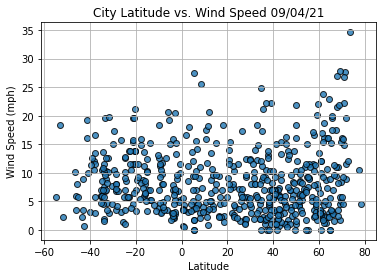

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                      Mataura
Country                        NZ
Date          2021-09-04 17:39:47
Lat                      -46.1927
Lng                      168.8643
Max Temp                    50.49
Humidity                       70
Cloudiness                    100
Wind Speed                   6.02
Name: 13, dtype: object

In [22]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3       True
4      False
       ...  
564     True
565    False
566     True
567     True
568     True
Name: Lat, Length: 569, dtype: bool

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Aklavik,CA,2021-09-04 17:39:44,68.2191,-135.0107,48.20,100,90,3.44
5,Kapaa,US,2021-09-04 17:39:45,22.0752,-159.3190,79.12,71,20,3.00
6,Nikolskoye,RU,2021-09-04 17:39:45,59.7035,30.7861,48.09,82,85,7.31
10,Porto Santo,PT,2021-09-04 17:39:46,33.0720,-16.3415,79.30,65,40,18.41
12,Tuktoyaktuk,CA,2021-09-04 17:39:47,69.4541,-133.0374,42.80,100,90,4.61


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

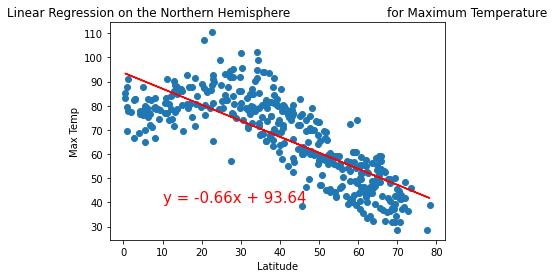

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

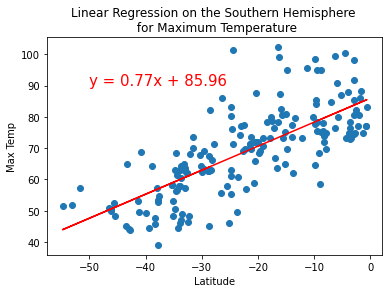

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

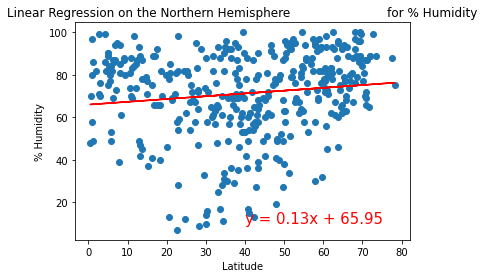

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

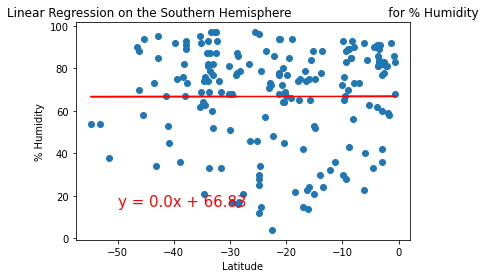

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

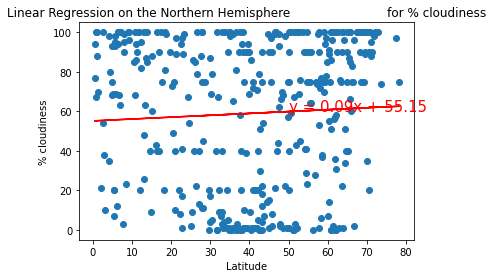

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % cloudiness', '% cloudiness',(50,60))

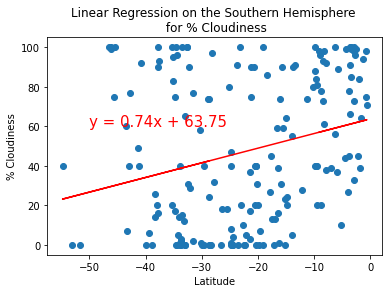

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

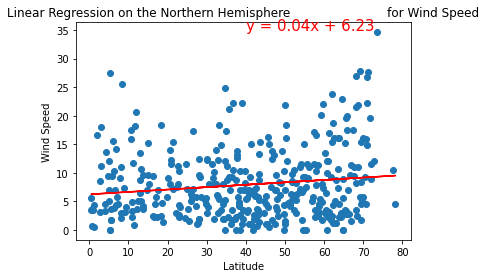

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

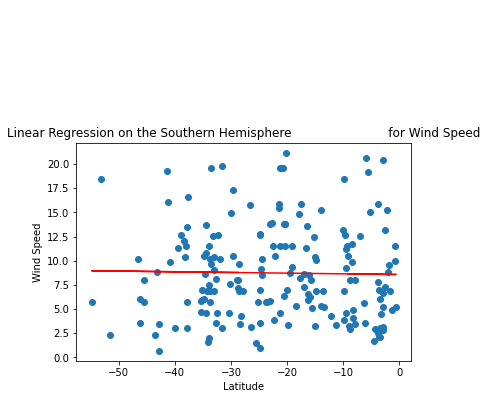

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))